In [ ]:
###Dependencies
#import libraries required for Exploratory Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [ ]:
df = pd.read_csv('post_harvest.csv')

In [ ]:
#viewing the first few rows of the dataset
print(df.head())

   Unnamed: 0  m49_code  cpc_code     commodity  year  loss_percentage  \
0           0       104  23161.02  Rice, milled  2015             1.78   
1           1       104  23161.02  Rice, milled  2015            11.77   
2           2       104  23161.02  Rice, milled  2015             5.88   
3           3       104  23161.02  Rice, milled  2015             3.57   
4           4       104  23161.02  Rice, milled  2015            17.65   

  loss_percentage_original loss_quantity activity food_supply_stage  \
0                    1.78%      26.12kgs  Storage           Storage   
1                   11.77%      88.18kgs  Storage           Storage   
2                    5.88%      44.09kgs  Storage           Storage   
3                    3.57%      52.24kgs  Storage           Storage   
4                   17.65%     132.27kgs  Storage           Storage   

                        treatment cause_of_loss sample_size  \
0  30 days storage, with trapping       Rodents         NaN   
1 

In [ ]:
#analysing the data types of each column of our dataset
print(df.dtypes)

Unnamed: 0                    int64
m49_code                      int64
cpc_code                    float64
commodity                    object
year                          int64
loss_percentage             float64
loss_percentage_original     object
loss_quantity                object
activity                     object
food_supply_stage            object
treatment                    object
cause_of_loss                object
sample_size                  object
method_data_collection       object
reference                    object
url                          object
notes                        object
dtype: object


In [ ]:
print(df["cause_of_loss"].value_counts().sum())
print(df["treatment"].value_counts().sum())

207
431


In [ ]:
df = pd.read_csv("post_harvest.csv", usecols=["m49_code", "commodity", "year", "loss_percentage", "activity"])

# The columns added to usecol are the only ones explicitly needed
# Some columns like cpc_code, loss_percentage_original, food_supply_stage can be inferred from others and are thus redundant
# The remaining are irrelevant or underfilled
# m49_code is included as it separates entries with same commodity and same year from appearing like a repitition

In [ ]:
df.head()

,m49_code,commodity,year,loss_percentage,activity
0,104,"Rice, milled",2015,1.78,Storage
1,104,"Rice, milled",2015,11.77,Storage
2,104,"Rice, milled",2015,5.88,Storage
3,104,"Rice, milled",2015,3.57,Storage
4,104,"Rice, milled",2015,17.65,Storage


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10396 entries, 0 to 10395
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   m49_code         10396 non-null  int64  
 1   commodity        10396 non-null  object 
 2   year             10396 non-null  int64  
 3   loss_percentage  10396 non-null  float64
 4   activity         10027 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 406.2+ KB


In [ ]:
d_frame = df
d_frame##returns the more cleaned dataset where the columns with missing values are eliminated
d_frame.to_csv('cleaned_post_harvest_data.csv', index=False)
print(d_frame)

       m49_code     commodity  year  loss_percentage            activity
0           104  Rice, milled  2015          1.78000             Storage
1           104  Rice, milled  2015         11.77000             Storage
2           104  Rice, milled  2015          5.88000             Storage
3           104  Rice, milled  2015          3.57000             Storage
4           104  Rice, milled  2015         17.65000             Storage
...         ...           ...   ...              ...                 ...
10391       894        Millet  2000          2.50000      Transportation
10392       894        Millet  2000          2.50000           Winnowing
10393       894        Millet  2000          2.38075             Storage
10394       894        Millet  2000          3.44008  Drying, Harvesting
10395       894        Millet  2000          1.27433             Storage

[10396 rows x 5 columns]


In [ ]:
df[df["activity"].isna()]

,m49_code,commodity,year,loss_percentage,activity
318,116,Tomatoes,2015,24.6,NaN
319,116,Tomatoes,2013,12.5,NaN
320,116,Tomatoes,2013,3.5,NaN
321,116,Tomatoes,2013,3.5,NaN
322,116,Tomatoes,2013,3.5,NaN
...,...,...,...,...,...
9687,840,Tomatoes,2004,15.0,NaN
9688,840,Tomatoes,2003,15.0,NaN
9689,840,Tomatoes,2002,15.0,NaN
9690,840,Tomatoes,2001,15.0,NaN


In [ ]:
# i will drop the rows with missing data for now since they are not a lot, but we can change that later
df  = df.dropna()

In [ ]:
df.describe()

,m49_code,year,loss_percentage
count,10027.000000,10027.000000,10027.000000
mean,449.486686,2010.632193,2.674778
std,259.613855,6.173448,2.797417
min,11.000000,2000.000000,0.004021
25%,231.000000,2006.000000,1.250000
50%,454.000000,2010.000000,2.500000
75%,686.000000,2016.000000,3.137140
max,894.000000,2022.000000,61.100000


In [ ]:
df["commodity"].unique()

array(['Rice, milled', 'Wheat', 'Rice', 'Millet', 'Tomatoes',
       'Lentils, dry', 'Mustard seed', 'Sunflower seed',
       'Other pulses n.e.c.', 'Sugar cane'], dtype=object)

In [ ]:
df[df["commodity"] == "Rice, milled"].count()

,0
m49_code,16
commodity,16
year,16
loss_percentage,16
activity,16


In [ ]:
df = df[df["commodity"] != "Rice, milled"]

""" The amount of Rice, milled is few enough to not affect the data and potentially
different enough to have different post harvest loss profile from regular rice so dropped """

' The amount of Rice, milled is few enough to not affect the data and potentially\ndifferent enough to have different post harvest loss profile from regular rice so dropped '

In [ ]:
df[df["commodity"] == "Other pulses n.e.c."].count()

,0
m49_code,8
commodity,8
year,8
loss_percentage,8
activity,8


In [ ]:
df = df[df["commodity"] != "Other pulses n.e.c."]

In [ ]:
print(df["activity"].unique())

['Drying, Harvesting' 'Storage' 'Shelling, Threshing' 'Transportation'
 'Winnowing' 'Milling' 'Drying' 'Parboiling' 'Wholesale' 'Collection'
 'Farm' 'Retailing'
 'Cleaning, Collection, Distribution, Drying, Field, Harvesting, Shelling, Storage, Threshing, Transportation'
 'Harvesting' 'Drying, Farm' 'Distribution' 'Processing' 'Threshing'
 'Sorting' 'Grading, Sorting' 'Consumption' 'Cleaning, Farm'
 'Farm, Threshing' 'Farm, Handling, Storage' 'Packaging, Processing'
 'Assembling, Farm' 'Packaging' 'Marketing, Storage'
 'Loading, Marketing, Transportation, Unloading'
 'Marketing, Storage, Transportation' 'Farm, Storage' 'Handling'
 'Distribution, Marketing, Storage' 'Marketing, Transportation' 'Loading'
 'Bagging, Packaging' 'Loading, Unloading'
 'Collection, Harvesting, Packaging, Sorting, Transportation'
 'Collection, Grading, Harvesting, Packaging, Retailing, Storage, Transportation, Wholesale'
 'Collection, Drying, Farm, Packaging, Winnowing' 'Marketing'
 'Cleaning, Winnowing' 'Coll

In [ ]:
# Data cleaning for the activity column is complex enough that dropping will not work

activity_set = set()
for act in list(df["activity"].unique()):
    act = act.replace(",", " ") # remove commas in order to make the spliting more clean
    sub_acts = act.split()
    for sub_act in sub_acts:
        activity_set.add(sub_act.strip()) # in order to remove possible whitespace

print(activity_set)
print(len(activity_set))

{'Cleaning', 'Sorting', 'Storage', 'Ripening', 'Handling', 'Field', 'Consumption', 'Collection', 'Assembling', 'Bundling', 'Grading', 'Bulking', 'Winnowing', 'Marketing', 'Manufacturing', 'Drying', 'Shelling', 'Bagging', 'Wholesale', 'Transportation', 'Loading', 'Farm', 'Harvesting', 'Stacking', 'Threshing', 'Unloading', 'Milling', 'Processing', 'Distribution', 'Retailing', 'Trading', 'Parboiling', 'Packaging'}
33


In [ ]:
def fill_activity_column(x, act):
    if act in x:
        return 1
    return 0

In [ ]:
for act in activity_set:
    df[act] = df["activity"].apply(fill_activity_column, act=act)

# created columns for each possible activity, and filled the columns based on if that activity was included in that entry

In [ ]:
df.head()

,m49_code,commodity,year,loss_percentage,activity,Cleaning,Sorting,Storage,Ripening,Handling,...,Stacking,Threshing,Unloading,Milling,Processing,Distribution,Retailing,Trading,Parboiling,Packaging
6,108,Wheat,2021,4.43333,"Drying, Harvesting",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,108,Wheat,2021,4.86667,Storage,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,108,Wheat,2021,3.50000,"Shelling, Threshing",0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,108,Wheat,2021,2.50000,Transportation,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,108,Rice,2021,2.50000,Winnowing,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop("activity", axis=1, inplace=True)

# activity column no longer needed

In [ ]:
df.head()

,m49_code,commodity,year,loss_percentage,Cleaning,Sorting,Storage,Ripening,Handling,Field,...,Stacking,Threshing,Unloading,Milling,Processing,Distribution,Retailing,Trading,Parboiling,Packaging
6,108,Wheat,2021,4.43333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,108,Wheat,2021,4.86667,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,108,Wheat,2021,3.50000,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,108,Wheat,2021,2.50000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,108,Rice,2021,2.50000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.to_csv("new_post_harvest_data.csv", index=False)

# **Visualisation**

## Overview

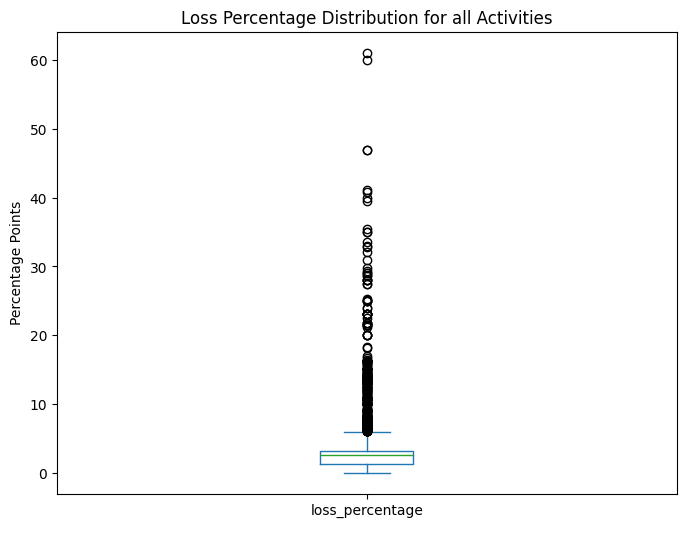

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
df["loss_percentage"].plot.box(ax=ax)
plt.title('Loss Percentage Distribution for all Activities')
plt.xlabel(' ')
plt.ylabel('Percentage Points')
plt.show()

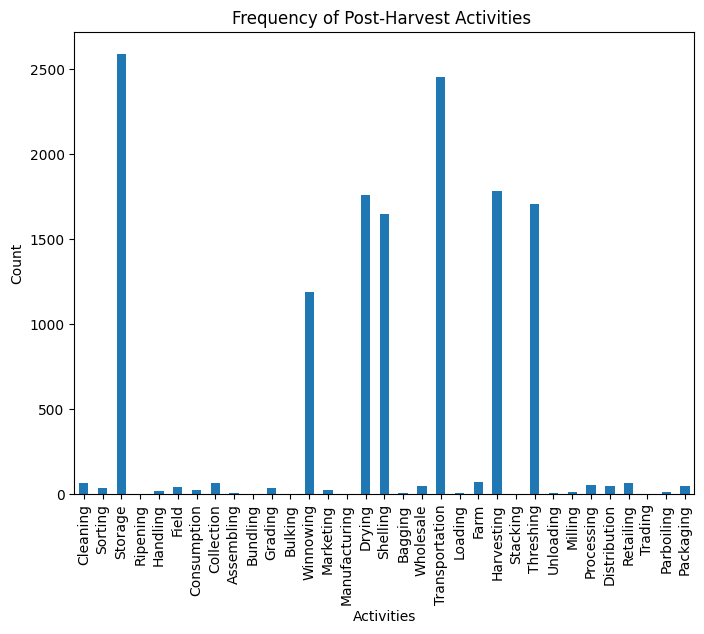

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
df[df.columns[4:]].sum().plot.bar(ax=ax)
plt.title('Frequency of Post-Harvest Activities ')
plt.xlabel('Activities')
plt.ylabel('Count')
plt.show()

In [ ]:
df["commodity"].value_counts()

,count
commodity,
Rice,4270
Millet,3632
Wheat,1829
Tomatoes,180
Sunflower seed,36
Mustard seed,30
Sugar cane,24
"Lentils, dry",2


In [ ]:
grouped_df = df[df["commodity"].isin(["Rice", "Wheat", "Millet"])].groupby(["m49_code", "commodity", "year"])["loss_percentage"].sum()
grouped_df.head()

m49_code  commodity  year
11        Rice       2010    15.000000
24        Millet     2000    12.831621
                     2001    13.203230
                     2002    13.235315
                     2003    13.051080
Name: loss_percentage, dtype: float64

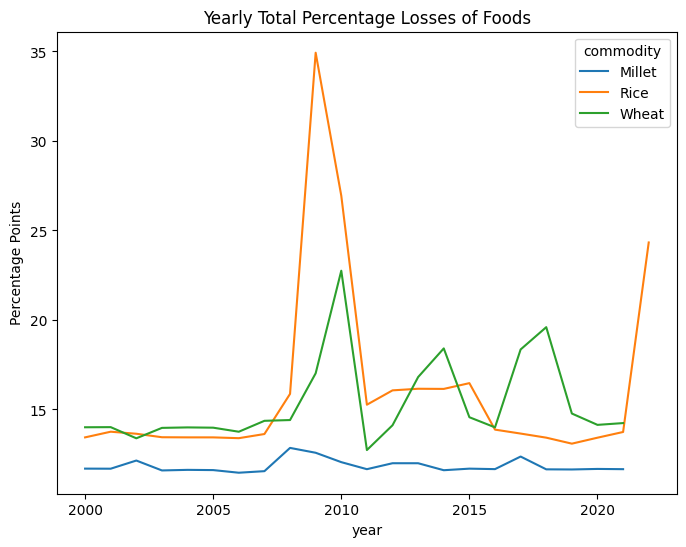

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
grouped_df.groupby(level=["commodity", "year"]).mean().unstack('commodity').plot.line(ax=ax)
plt.title('Yearly Total Percentage Losses of Foods')
plt.ylabel('Percentage Points')
plt.show()

##Rice

In [ ]:
rice_df = df[df["commodity"] == "Rice"]
rice_df.head()

,m49_code,commodity,year,loss_percentage,Cleaning,Sorting,Storage,Ripening,Handling,Field,...,Stacking,Threshing,Unloading,Milling,Processing,Distribution,Retailing,Trading,Parboiling,Packaging
10,108,Rice,2021,2.50000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,108,Rice,2021,1.25000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,108,Rice,2021,4.40333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,108,Rice,2021,1.20000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,108,Rice,2021,3.13714,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


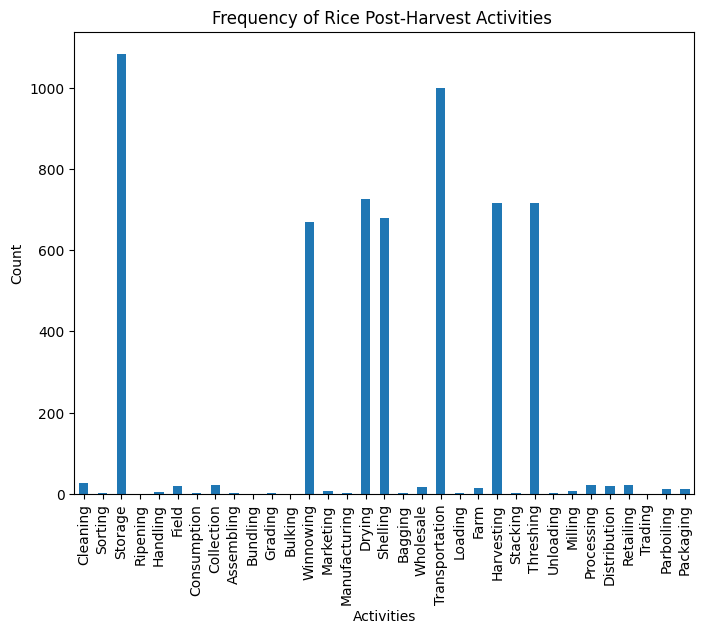

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
rice_df[rice_df.columns[4:]].sum().plot.bar(ax=ax)
plt.title('Frequency of Rice Post-Harvest Activities ')
plt.xlabel('Activities')
plt.ylabel('Count')
plt.show()

In [ ]:
# 7 activities dominate for Rice so we can drop the rest for our analysis

rice_act_freq = rice_df[rice_df.columns[4:]].sum()
rice_act_list = list(rice_act_freq[rice_act_freq > 500].index)
rice_loss_df = rice_df[rice_df[rice_act_list[0]] == 0].groupby("year")["loss_percentage"].mean()
rice_loss_df = rice_loss_df.rename(rice_act_list[0])
rice_loss_df.index.name = None

for act in rice_act_list[1:]:
    interim_df =  rice_df[rice_df[act] == 0].groupby("year")["loss_percentage"].mean()
    interim_df = interim_df.rename(act)
    interim_df.index.name = None
    rice_loss_df = pd.concat([rice_loss_df, interim_df], axis=1)
rice_loss_df.head()

,Storage,Winnowing,Drying,Shelling,Transportation,Harvesting,Threshing
2000,2.642807,2.263976,1.870183,2.133676,2.672549,1.870183,2.133676
2001,2.712751,2.329503,1.871452,2.199307,2.744530,1.871452,2.199307
2002,2.688204,2.305955,1.870427,2.175751,2.718663,1.870427,2.175751
2003,2.643507,2.265640,1.871211,2.135336,2.674378,1.871211,2.135336
2004,2.643529,2.264036,1.869606,2.133711,2.672615,1.869606,2.133711


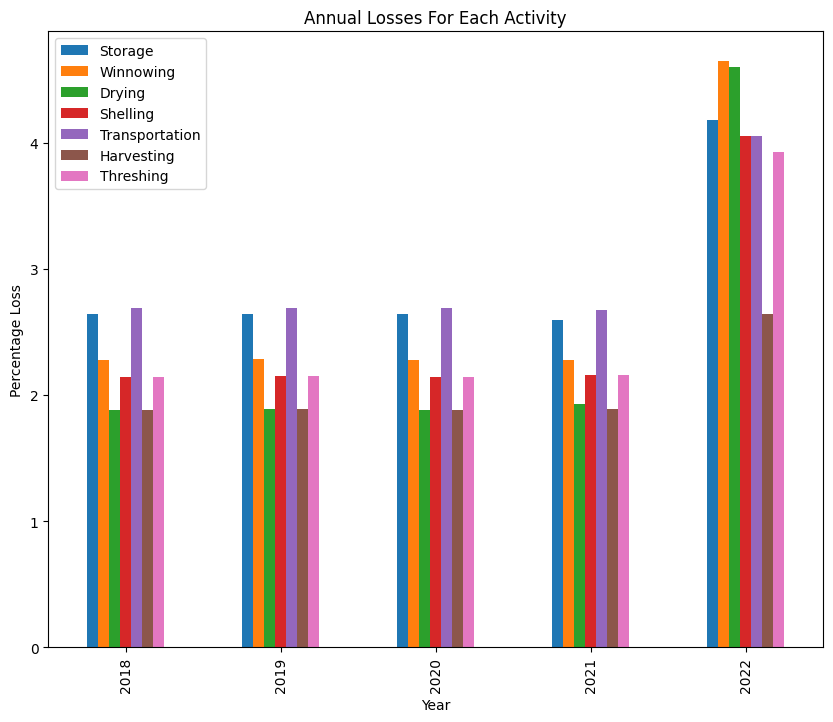

In [ ]:
# We investigate the losses observed for the last 5 years

fig, ax = plt.subplots(figsize=(10, 8))
rice_loss_df.iloc[-5:].plot.bar(ax=ax)
plt.title('Annual Losses For Each Activity')
plt.xlabel('Year')
plt.ylabel('Percentage Loss')
plt.show()

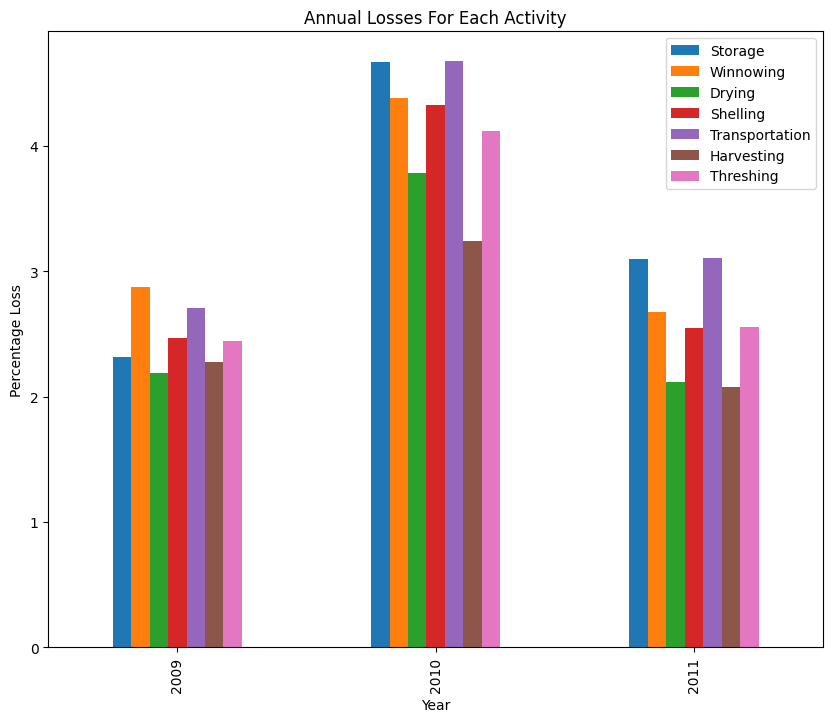

In [ ]:
# We investigate the abnormal losses observed for 2010 in the data

fig, ax = plt.subplots(figsize=(10, 8))
rice_loss_df.loc[2009:2011].plot.bar(ax=ax)
plt.title('Annual Losses For Each Activity')
plt.xlabel('Year')
plt.ylabel('Percentage Loss')
plt.show()

##Wheat

In [ ]:
wheat_df = df[df["commodity"] == "Wheat"]
wheat_df.head()

,m49_code,commodity,year,loss_percentage,Cleaning,Sorting,Storage,Ripening,Handling,Field,...,Stacking,Threshing,Unloading,Milling,Processing,Distribution,Retailing,Trading,Parboiling,Packaging
6,108,Wheat,2021,4.43333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,108,Wheat,2021,4.86667,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,108,Wheat,2021,3.50000,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,108,Wheat,2021,2.50000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,108,Wheat,2020,3.50000,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


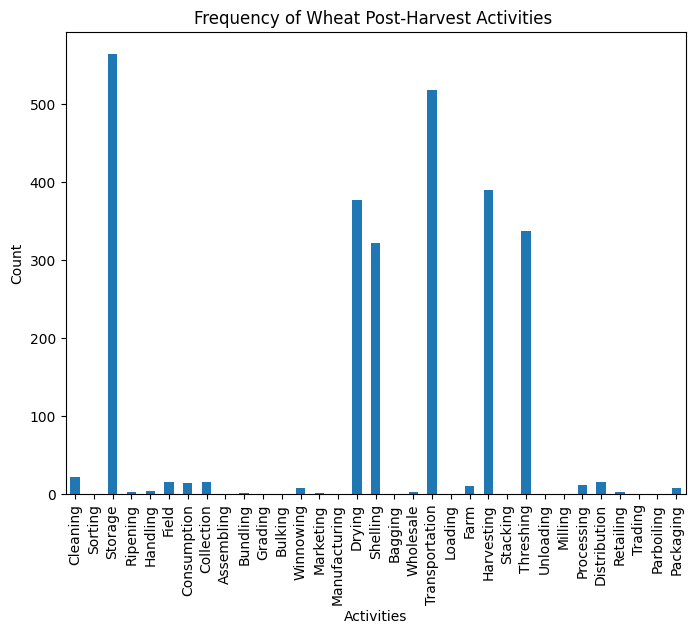

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
wheat_df[wheat_df.columns[4:]].sum().plot.bar(ax=ax)
plt.title('Frequency of Wheat Post-Harvest Activities ')
plt.xlabel('Activities')
plt.ylabel('Count')
plt.show()

In [ ]:
# 6 activities dominate for Wheat so we can drop the rest for our analysis

wheat_act_freq = wheat_df[wheat_df.columns[4:]].sum()
wheat_act_list = list(wheat_act_freq[wheat_act_freq > 300].index)
wheat_loss_df = wheat_df[wheat_df[wheat_act_list[0]] == 0].groupby("year")["loss_percentage"].mean()
wheat_loss_df = wheat_loss_df.rename(wheat_act_list[0])
wheat_loss_df.index.name = None

for act in wheat_act_list[1:]:
    interim_df =  wheat_df[wheat_df[act] == 0].groupby("year")["loss_percentage"].mean()
    interim_df = interim_df.rename(act)
    interim_df.index.name = None
    wheat_loss_df = pd.concat([wheat_loss_df, interim_df], axis=1)
wheat_loss_df.head()

,Storage,Drying,Shelling,Transportation,Harvesting,Threshing
2000,3.033718,2.730425,2.918633,3.483038,2.730425,2.918633
2001,3.033718,2.732370,2.920513,3.485208,2.732370,2.920513
2002,3.033718,2.743894,2.928575,3.483832,2.743894,2.928575
2003,3.033718,2.720961,2.909485,3.472483,2.720961,2.909485
2004,3.034143,2.727896,2.916557,3.480643,2.727896,2.916557


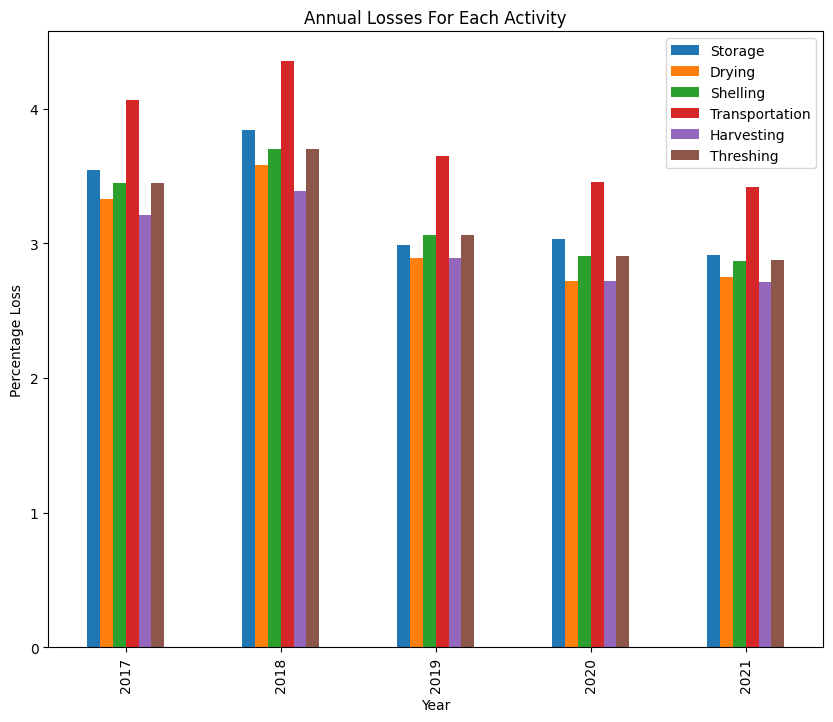

In [ ]:
# We investigate the losses observed for the last 5 years

fig, ax = plt.subplots(figsize=(10, 8))
wheat_loss_df.iloc[-5:].plot.bar(ax=ax)
plt.title('Annual Losses For Each Activity')
plt.xlabel('Year')
plt.ylabel('Percentage Loss')
plt.show()

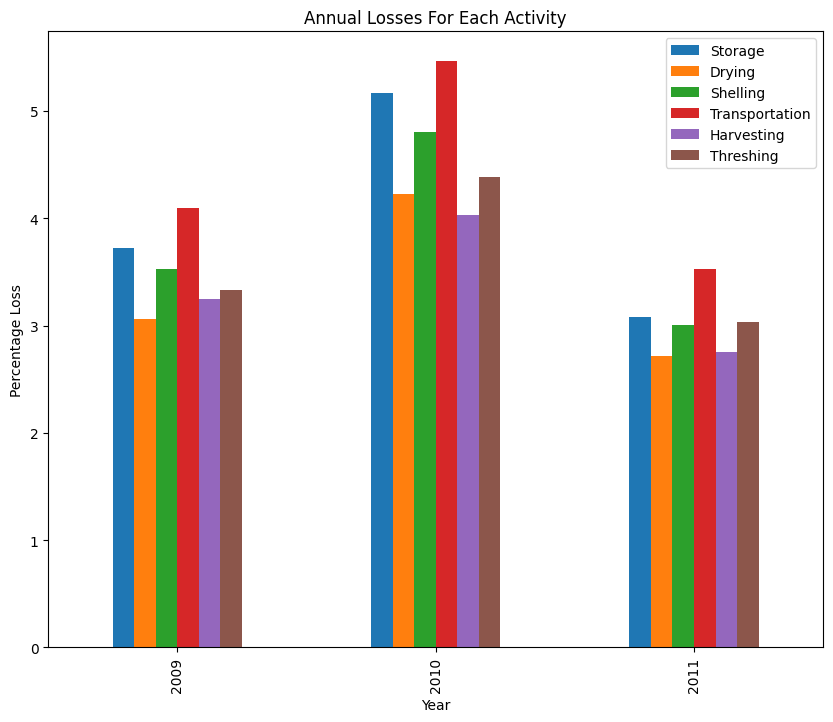

In [ ]:
# We investigate the abnormal losses observed for 2010 in the data

fig, ax = plt.subplots(figsize=(10, 8))
wheat_loss_df.loc[2009:2011].plot.bar(ax=ax)
plt.title('Annual Losses For Each Activity')
plt.xlabel('Year')
plt.ylabel('Percentage Loss')
plt.show()

##Millet

In [ ]:
millet_df = df[df["commodity"] == "Millet"]
millet_df.head()

,m49_code,commodity,year,loss_percentage,Cleaning,Sorting,Storage,Ripening,Handling,Field,...,Stacking,Threshing,Unloading,Milling,Processing,Distribution,Retailing,Trading,Parboiling,Packaging
15,108,Millet,2021,2.000,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
16,108,Millet,2021,3.500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,108,Millet,2021,2.500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,108,Millet,2021,1.175,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,108,Millet,2021,2.500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


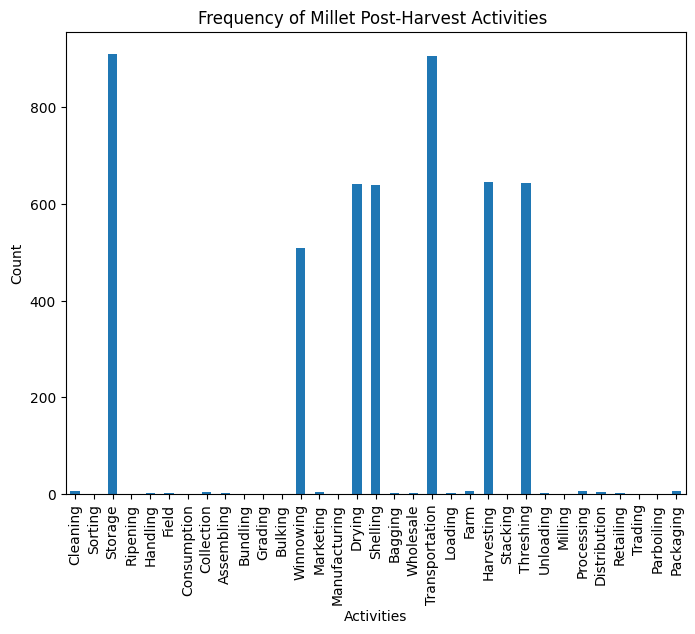

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
millet_df[millet_df.columns[4:]].sum().plot.bar(ax=ax)
plt.title('Frequency of Millet Post-Harvest Activities ')
plt.xlabel('Activities')
plt.ylabel('Count')
plt.show()

In [ ]:
# 7 activities dominate for Millet so we can drop the rest for our analysis

millet_act_freq = millet_df[millet_df.columns[4:]].sum()
millet_act_list = list(millet_act_freq[millet_act_freq > 300].index)
millet_loss_df = millet_df[millet_df[millet_act_list[0]] == 0].groupby("year")["loss_percentage"].mean()
millet_loss_df = millet_loss_df.rename(millet_act_list[0])
millet_loss_df.index.name = None

for act in millet_act_list[1:]:
    interim_df =  millet_df[millet_df[act] == 0].groupby("year")["loss_percentage"].mean()
    interim_df = interim_df.rename(act)
    interim_df.index.name = None
    millet_loss_df = pd.concat([millet_loss_df, interim_df], axis=1)
millet_loss_df.head()

,Storage,Winnowing,Drying,Shelling,Transportation,Harvesting,Threshing
2000,2.347524,2.108347,1.786335,2.098640,2.087850,1.786335,2.098640
2001,2.346421,2.108717,1.785147,2.097737,2.086858,1.785147,2.097737
2002,2.435575,2.183723,1.870113,2.180170,2.177422,1.870113,2.100918
2003,2.355977,2.119597,1.791401,2.108116,2.089019,1.791401,2.108116
2004,2.358422,2.124620,1.798244,2.115283,2.096838,1.798244,2.115283


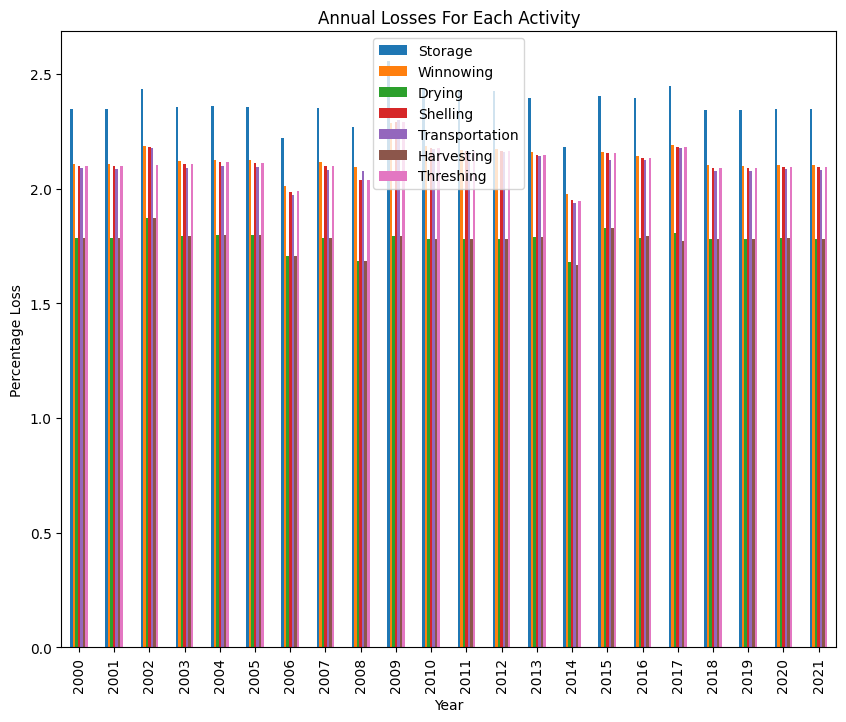

In [ ]:
# We investigate the losses observed for the last 5 years

fig, ax = plt.subplots(figsize=(10, 8))
millet_loss_df.plot.bar(ax=ax)
plt.title('Annual Losses For Each Activity')
plt.xlabel('Year')
plt.ylabel('Percentage Loss')
plt.show()

# Predictive model for Rice

In [ ]:
tdata = df[df["commodity"] == "Rice"]
print(tdata.head())
tdata.shape

    m49_code commodity  year  loss_percentage  Cleaning  Sorting  Storage  \
10       108      Rice  2021          2.50000         0        0        0   
11       108      Rice  2021          1.25000         0        0        0   
12       108      Rice  2021          4.40333         0        0        0   
13       108      Rice  2021          1.20000         0        0        1   
14       108      Rice  2021          3.13714         0        0        0   

    Ripening  Handling  Field  ...  Stacking  Threshing  Unloading  Milling  \
10         0         0      0  ...         0          0          0        0   
11         0         0      0  ...         0          0          0        0   
12         0         0      0  ...         0          0          0        0   
13         0         0      0  ...         0          0          0        0   
14         0         0      0  ...         0          1          0        0   

    Processing  Distribution  Retailing  Trading  Parboiling  

(4270, 37)

In [ ]:
# Calculate the sum of each column for each commodity
column_sums_by_commodity = tdata.groupby('commodity')[tdata.columns[4:]].sum()

# Filter columns based on the sum being greater than 300 for each commodity
filtered_cols_by_commodity = column_sums_by_commodity[column_sums_by_commodity > 300].dropna(axis=1).columns

# Select only the filtered columns from the original DataFrame
filtered = tdata[['commodity','year','m49_code','loss_percentage'] + list(filtered_cols_by_commodity)]

# Display the head of the filtered DataFrame
filtered.head()
filtered.shape

(4270, 11)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
X = filtered.drop(columns=['loss_percentage', 'commodity'])  # Exclude irrelevant columns
y = filtered['loss_percentage']

categorical_features = X.select_dtypes(include=['object']).columns
if len(categorical_features) > 0:
         encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
         encoded_features = encoder.fit_transform(X[categorical_features])
         encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
         X = X.drop(columns=categorical_features).reset_index(drop=True)
         X = pd.concat([X, encoded_df], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
numerical_features = X_train.select_dtypes(include=['number']).columns
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV  # Import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



rf_regressor = RandomForestRegressor(random_state=42)  # Initialize the regressor
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_rf_regressor = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
best_rf_regressor.fit(X_train, y_train)  # Train the model with the best hyperparameters
# Make predictions on the test set
y_pred = best_rf_regressor.predict(X_test)

# Evaluate the model using appropriate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mean Squared Error: 1.9197145037920191
R-squared: 0.6591421005241258


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
rf_regressor = RandomForestRegressor(random_state=42)
gb_regressor = GradientBoostingRegressor(random_state=42)
lr_regressor = LinearRegression()

# Train models
rf_regressor.fit(X_train, y_train)
gb_regressor.fit(X_train, y_train)
lr_regressor.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_regressor.predict(X_test)
gb_predictions = gb_regressor.predict(X_test)
lr_predictions = lr_regressor.predict(X_test)

# Evaluate models`
models = ['Random Forest', 'Gradient Boosting', 'Linear Regression']
predictions = [rf_predictions, gb_predictions, lr_predictions]

for model, pred in zip(models, predictions):
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print(f'{model}:')
    print(f'  Mean Squared Error: {mse}')
    print(f'  R-squared: {r2}')

Random Forest:
  Mean Squared Error: 2.3725295854082873
  R-squared: 0.5787418132596195
Gradient Boosting:
  Mean Squared Error: 2.463005838256049
  R-squared: 0.5626771612307795
Linear Regression:
  Mean Squared Error: 3.955546646189738
  R-squared: 0.29766675282402055


In [ ]:
# Get feature importance scores
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to store feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df = feature_importance_df.drop(feature_importance_df.index[[1, 2]])  # Assuming 0-based indexing


# Display the feature importance DataFrame
print(feature_importance_df)

          Feature  Importance
7      Harvesting    0.344404
2         Storage    0.107237
0            year    0.075065
3       Winnowing    0.020362
8       Threshing    0.014484
5        Shelling    0.010387
6  Transportation    0.005937


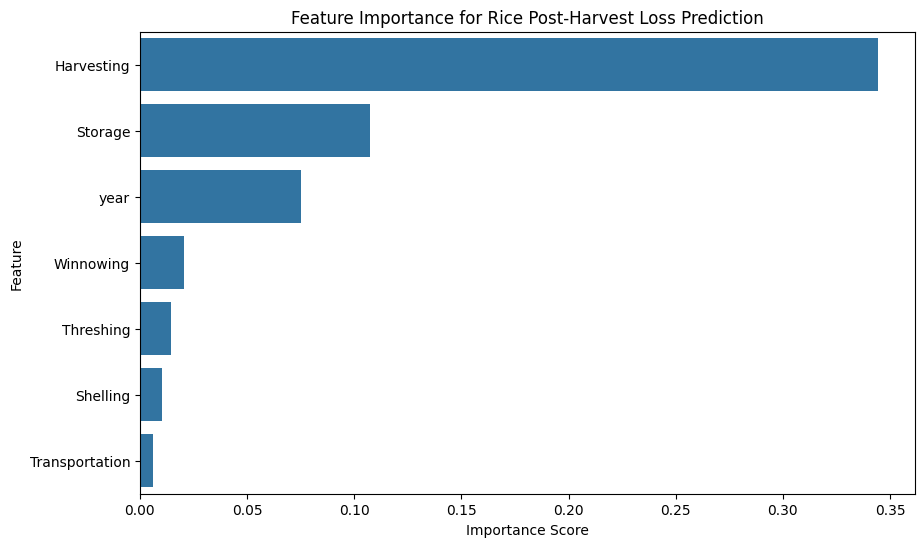

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'feature_importance_df' is already calculated as in the previous code

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Rice Post-Harvest Loss Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Predictive model for Wheat

In [ ]:
tdata = df[df["commodity"] == "Wheat"]
print(tdata.head())
tdata.shape

    m49_code commodity  year  loss_percentage  Cleaning  Sorting  Storage  \
6        108     Wheat  2021          4.43333         0        0        0   
7        108     Wheat  2021          4.86667         0        0        1   
8        108     Wheat  2021          3.50000         0        0        0   
9        108     Wheat  2021          2.50000         0        0        0   
20       108     Wheat  2020          3.50000         0        0        0   

    Ripening  Handling  Field  ...  Stacking  Threshing  Unloading  Milling  \
6          0         0      0  ...         0          0          0        0   
7          0         0      0  ...         0          0          0        0   
8          0         0      0  ...         0          1          0        0   
9          0         0      0  ...         0          0          0        0   
20         0         0      0  ...         0          1          0        0   

    Processing  Distribution  Retailing  Trading  Parboiling  

(1829, 37)

In [ ]:
# Calculate the sum of each column for each commodity
column_sums_by_commodityW = tdata.groupby('commodity')[tdata.columns[4:]].sum()

# Filter columns based on the sum being greater than 300 for each commodity
filtered_cols_by_commodityW = column_sums_by_commodityW[column_sums_by_commodityW > 300].dropna(axis=1).columns

# Select only the filtered columns from the original DataFrame
filteredW = tdata[['commodity','year','m49_code','loss_percentage'] + list(filtered_cols_by_commodity)]

# Display the head of the filtered DataFrame
filteredW.head()
filteredW.shape

(1829, 11)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
X = filteredW.drop(columns=['loss_percentage', 'commodity'])  # Exclude irrelevant columns
y = filteredW['loss_percentage']

categorical_features = X.select_dtypes(include=['object']).columns
if len(categorical_features) > 0:
         encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
         encoded_features = encoder.fit_transform(X[categorical_features])
         encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
         X = X.drop(columns=categorical_features).reset_index(drop=True)
         X = pd.concat([X, encoded_df], axis=1)

X_trainw, X_testw, y_trainw, y_testw = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
numerical_features = X_train.select_dtypes(include=['number']).columns
X_trainw[numerical_features] = scaler.fit_transform(X_trainw[numerical_features])
X_testw[numerical_features] = scaler.transform(X_testw[numerical_features])


In [ ]:
rf_regressor = RandomForestRegressor(random_state=42)  # Initialize the regressor
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_trainw, y_trainw)

# Get the best model and its hyperparameters
best_rf_regressor = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
best_rf_regressor.fit(X_trainw, y_trainw)  # Train the model with the best hyperparameters
# Make predictions on the test set
y_pred = best_rf_regressor.predict(X_testw)

# Evaluate the model using appropriate metrics
mse = mean_squared_error(y_testw, y_pred)
r2 = r2_score(y_testw, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error: 1.995999077307303
R-squared: 0.5809376290168182


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
rf_regressor = RandomForestRegressor(random_state=42, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200)
gb_regressor = GradientBoostingRegressor(random_state=42)
lr_regressor = LinearRegression()

# Train models
rf_regressor.fit(X_trainw, y_trainw)
gb_regressor.fit(X_trainw, y_trainw)
lr_regressor.fit(X_trainw, y_trainw)

# Make predictions
rf_predictions = rf_regressor.predict(X_testw)
gb_predictions = gb_regressor.predict(X_testw)
lr_predictions = lr_regressor.predict(X_testw)

# Evaluate models
models = ['Random Forest', 'Gradient Boosting', 'Linear Regression']
predictions = [rf_predictions, gb_predictions, lr_predictions]

for model, pred in zip(models, predictions):
    mse = mean_squared_error(y_testw, pred)
    r2 = r2_score(y_testw, pred)
    print(f'{model}:')
    print(f'  Mean Squared Error: {mse}')
    print(f'  R-squared: {r2}')

Random Forest:
  Mean Squared Error: 2.115908976628745
  R-squared: 0.5557624035944762
Gradient Boosting:
  Mean Squared Error: 1.2169791458100019
  R-squared: 0.7444937865561404
Linear Regression:
  Mean Squared Error: 3.667728395719701
  R-squared: 0.22995607808289464


In [ ]:
# Get feature importance scores
feature_importances = gb_regressor.feature_importances_

# Create a DataFrame to store feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': X_trainw.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df = feature_importance_df.drop(feature_importance_df.index[[1, 5]])  # Assuming 0-based indexing

# Display the feature importance DataFrame
print(feature_importance_df)

          Feature  Importance
7      Harvesting    0.512904
4          Drying    0.140948
2         Storage    0.125142
3       Winnowing    0.022769
5        Shelling    0.011695
6  Transportation    0.007713
8       Threshing    0.003187


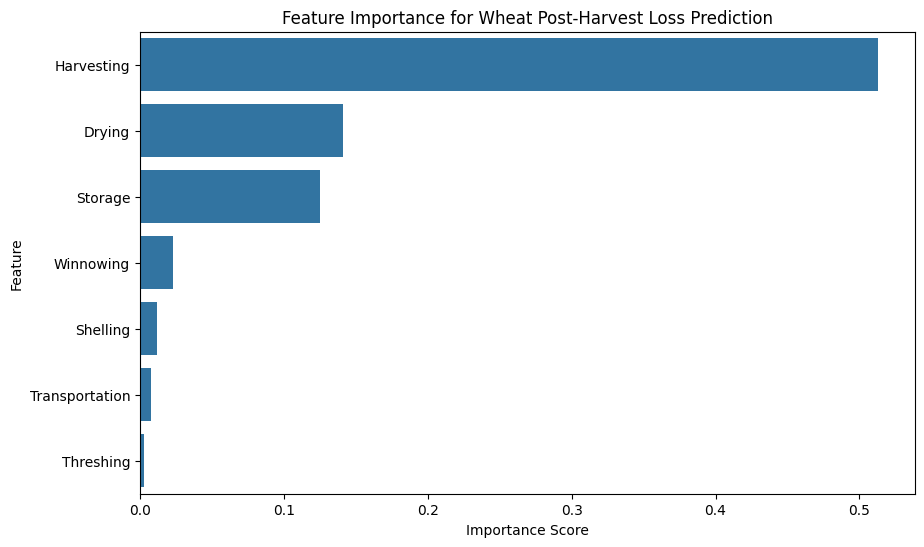

In [ ]:

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Wheat Post-Harvest Loss Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Predictive model for Millet

In [ ]:
tdata = df[df["commodity"] == "Millet"]
print(tdata.head())
tdata.shape

    m49_code commodity  year  loss_percentage  Cleaning  Sorting  Storage  \
15       108    Millet  2021            2.000         0        0        0   
16       108    Millet  2021            3.500         0        0        0   
17       108    Millet  2021            2.500         0        0        0   
18       108    Millet  2021            1.175         0        0        1   
19       108    Millet  2021            2.500         0        0        0   

    Ripening  Handling  Field  ...  Stacking  Threshing  Unloading  Milling  \
15         0         0      0  ...         0          1          0        0   
16         0         0      0  ...         0          0          0        0   
17         0         0      0  ...         0          0          0        0   
18         0         0      0  ...         0          0          0        0   
19         0         0      0  ...         0          0          0        0   

    Processing  Distribution  Retailing  Trading  Parboiling  

(3632, 37)

In [ ]:
# Calculate the sum of each column for each commodity
column_sums_by_commoditym = tdata.groupby('commodity')[tdata.columns[4:]].sum()

# Filter columns based on the sum being greater than 300 for each commodity
filtered_cols_by_commoditym = column_sums_by_commoditym[column_sums_by_commoditym > 300].dropna(axis=1).columns

# Select only the filtered columns from the original DataFrame
filteredm = tdata[['commodity','year','m49_code','loss_percentage'] + list(filtered_cols_by_commoditym)]

# Display the head of the filtered DataFrame
filteredm.head()
filteredm.shape

(3632, 11)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
X = filteredm.drop(columns=['loss_percentage', 'commodity'])  # Exclude irrelevant columns
y = filteredm['loss_percentage']

categorical_features = X.select_dtypes(include=['object']).columns
if len(categorical_features) > 0:
         encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
         encoded_features = encoder.fit_transform(X[categorical_features])
         encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
         X = X.drop(columns=categorical_features).reset_index(drop=True)
         X = pd.concat([X, encoded_df], axis=1)

X_trainm, X_testm, y_trainm, y_testm = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
numerical_features = X_train.select_dtypes(include=['number']).columns
X_trainm[numerical_features] = scaler.fit_transform(X_trainm[numerical_features])
X_testm[numerical_features] = scaler.transform(X_testm[numerical_features])


In [ ]:
rf_regressor = RandomForestRegressor(random_state=42)  # Initialize the regressor
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_trainm, y_trainm)

# Get the best model and its hyperparameters
best_rf_regressor = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
best_rf_regressor.fit(X_trainm, y_trainm)  # Train the model with the best hyperparameters
# Make predictions on the test set
y_pred = best_rf_regressor.predict(X_testm)

# Evaluate the model using appropriate metrics
mse = mean_squared_error(y_testm, y_pred)
r2 = r2_score(y_testm, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error: 0.4067113750850973
R-squared: 0.6488711438434245


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
rf_regressor = RandomForestRegressor(random_state=42, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200)
gb_regressor = GradientBoostingRegressor(random_state=42)
lr_regressor = LinearRegression()

# Train models
rf_regressor.fit(X_trainm, y_trainm)
gb_regressor.fit(X_trainm, y_trainm)
lr_regressor.fit(X_trainm, y_trainm)

# Make predictions
rf_predictions = rf_regressor.predict(X_testm)
gb_predictions = gb_regressor.predict(X_testm)
lr_predictions = lr_regressor.predict(X_testm)

# Evaluate models
models = ['Random Forest', 'Gradient Boosting', 'Linear Regression']
predictions = [rf_predictions, gb_predictions, lr_predictions]

for model, pred in zip(models, predictions):
    mse = mean_squared_error(y_testm, pred)
    r2 = r2_score(y_testm, pred)
    print(f'{model}:')
    print(f'  Mean Squared Error: {mse}')
    print(f'  R-squared: {r2}')

Random Forest:
  Mean Squared Error: 0.41930000151055546
  R-squared: 0.6380029206558417
Gradient Boosting:
  Mean Squared Error: 0.44874126276983245
  R-squared: 0.6125851993353749
Linear Regression:
  Mean Squared Error: 0.5394916897070984
  R-squared: 0.534237025278193


In [ ]:
# Get feature importance scores
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to store feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': X_trainm.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df = feature_importance_df.drop(feature_importance_df.index[[2, 4]])  # Assuming 0-based indexing

# Display the feature importance DataFrame
print(feature_importance_df)

          Feature  Importance
7      Harvesting    0.344404
4          Drying    0.211449
2         Storage    0.107237
3       Winnowing    0.020362
8       Threshing    0.014484
5        Shelling    0.010387
6  Transportation    0.005937


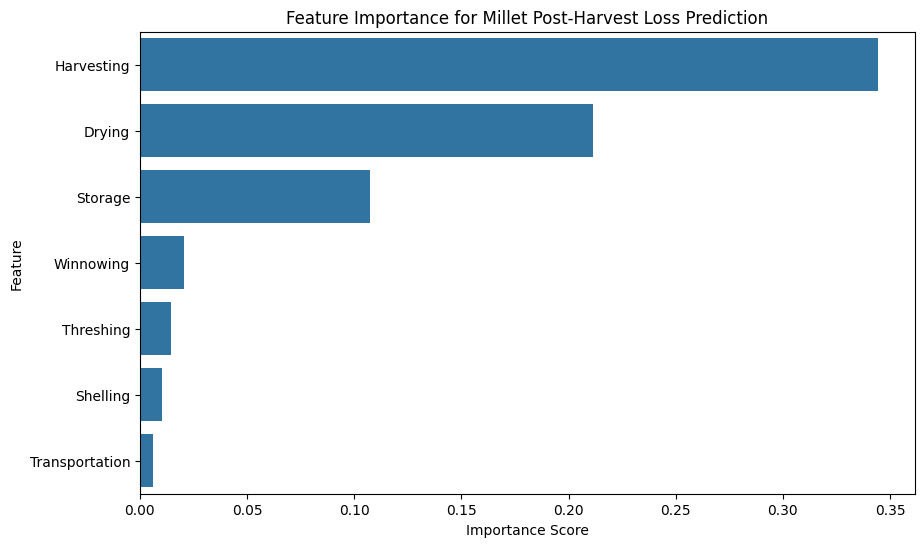

In [ ]:

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Millet Post-Harvest Loss Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()